<a href="https://colab.research.google.com/github/yogithahegde/Full-stack-data-science-projects/blob/main/Using_SVM_to_recognise_a_letter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#reading the data
data = pd.read_csv('/content/letterdata.csv')

In [3]:
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [4]:
data.shape

(20000, 17)

In [5]:
#split dependant and independant variables
X = np.array(data)[ :, 1:]
y = np.array(data.letter)[:]

The set of 20,000 unique letter images was organized into two files. 16000 items
were used as a learning set and the remaining 4000 items were used for testing the accuracy
of the rules. 

In [6]:
x_train = X[:16000, :]
x_test = X[16001: , :]
y_train = y[:16000]
y_test = y[16001:]

# BUilding SVM Model

In [7]:
from sklearn import svm
supvect = svm.SVC(C=3,gamma=0.25)

High C value means you care more about classifying all the training points correctly
*  A large value of C basically tells our model that we do not have that much faith in our data’s distribution, and will only consider points close to line of separation.
* If gamma is too large, the radius of the area of influence of the support vectors only includes the support vector itself and no amount of regularization with C will be able to prevent overfitting.

In [8]:
supvect.fit(x_train , y_train)

SVC(C=3, gamma=0.25)

In [9]:
y_pred = supvect.predict(x_test)

get % of correct letters predicted

In [10]:
def getAccuracy(test, pred):
	correct = 0
	for x in range(len(test)):
		if test[x]== pred[x]:
			correct += 1
	return (correct/float(len(test))) * 100.0

In [11]:
getAccuracy(y_test , y_pred) 

94.29857464366091

we have an accuracy of 94.29%

In [12]:
y_grid = (np.column_stack([y_test, y_pred]))  # stacking ytest and y pred

In [13]:
np.savetxt("ocr.csv", y_grid , fmt='%s')

In [14]:
import string
lab= list(string.ascii_uppercase[0:26]) #label a-z
plab=["Pr "+s for s in lab] #label predicted a-z

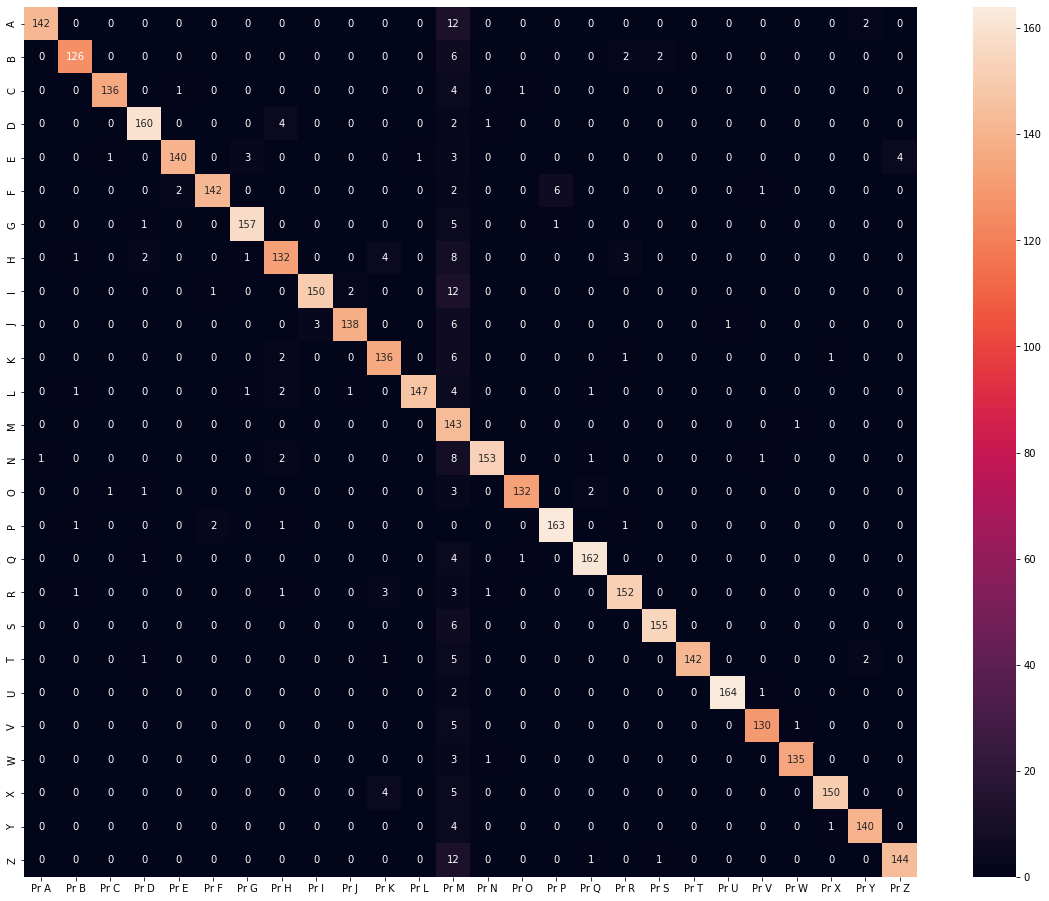

In [18]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test,y_pred,labels = lab)
df_cm = pd.DataFrame(cm,index = [i for i in lab],columns = [i for i in plab])
plt.figure(figsize = (20,16))
sns.heatmap(df_cm, annot=True ,fmt='g')

##How to read confusion metrix?
* Above we can see labels A and predicted A. So the number 144 indicates that 144 A's were predicted as A
* Also if you observe, we can see that 12 of the A's were predicted to be Ms